## Exercise 7- K-Means Clustering & Principal Component Analysis

In [1]:
# import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import imageio
from PIL import Image
from random import sample
import matplotlib.cm as cm 
from scipy import linalg # used for the 'SVD' function

### K-Means Clustering

In [2]:
# dataset 1
input_file = 'database/ex7data2.mat'

# scipy.io for loading .mat files
mat_data = scipy.io.loadmat(input_file)
X = mat_data['X']

# displaying shape of X
display(X.shape)

(300, 2)

In [3]:
# choose the number of centroids as K = 3
K = 3
# initial centroids as per the assignment PDF
initial_centroids = np.array([[3,3],[6,2],[8,5]])

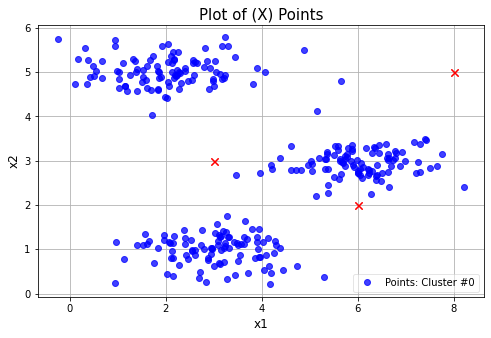

In [4]:
# visualizing the data
def plotData(X,centroids,idxs = None):
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    
    assert X[0].shape == centroids[0][0].shape
    assert centroids[-1].shape[0] <= len(colors)

    # if idxs provided, divide X into different colors
    if idxs is not None:
        assert idxs.shape[0] == X.shape[0]
        sub_X = []
        for x in range(centroids[0].shape[0]):
            sub_X.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == x]))
    else:
        sub_X = [X]
        
    figure = plt.figure(figsize=(8,5))
    for x in range(len(sub_X)):
        new_X = sub_X[x]
        plt.plot(new_X[:,0],new_X[:,1],'o',color=colors[x], alpha=0.75, label='Points: Cluster #%d'%x)
    plt.xlabel('x1',fontsize=12)
    plt.ylabel('x2',fontsize=12)
    plt.title('Plot of (X) Points',fontsize=15)
    plt.grid(True)

    # plotting the centroid movement history
    temp_x, temp_y = [], []
    for c in centroids:
        temp_x.append(c[:,0])
        temp_y.append(c[:,1])
    
    for x in range(len(temp_x[0])):
        plt.plot(temp_x,temp_y,'rx--', markersize=7)

    legend = plt.legend(loc=4,framealpha=0.5)
    
plotData(X,[initial_centroids])

In [5]:
# function for finding closest centroids
def distanceSquared(p1, p2):
    assert p1.shape == p2.shape
    return np.sum(np.square(p2-p1))

def findClosestCentroids(X, centroids):
    """
    Input: m*n matrix
    m: Number of points
    n: Number of features per point
    K: Number of clusters (therefore, number of centroids)
    Output: m*1 vector of cluster indices per point in X
    """
    idxs = np.zeros((X.shape[0],1))
    
    # looping through each data point in X
    for x in range(idxs.shape[0]):
        point = X[x]
        # comparing this point to each centroid, while keeping track of the shortest distance
        min_distance, idx = 9999999, 0
        for i in range(centroids.shape[0]):
            centroid = centroids[i]
            distance_squared = distanceSquared(centroid,point)
            if distance_squared < min_distance:
                min_distance = distance_squared
                idx = i
        # best index found, return the vector (idx)
        idxs[x] = idx
        
    return idxs

# initial cluster assignment
idxs = findClosestCentroids(X,initial_centroids)
#display(idxs)

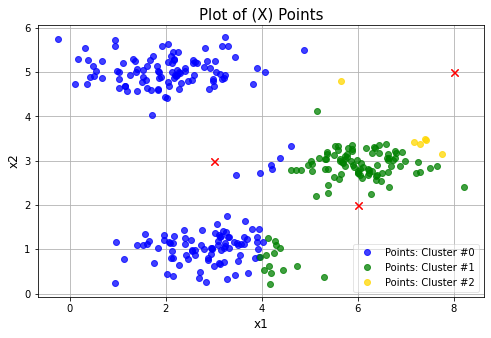

In [6]:
# initial clusters
plotData(X,[initial_centroids],idxs)

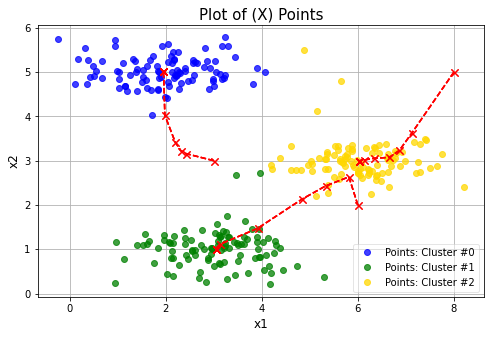

In [7]:
# function for computing centroid means
def computeCentroids(X, idxs):
    sub_X = []
    for x in range(len(np.unique(idxs))):
        sub_X.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == x]))
    return np.array([np.mean(current_X,axis=0) for current_X in sub_X])


# function for executing K-Means
def execute_KMeans(X, initial_centroids, K, num_iter):
    centroid_history = []
    current_centroids = initial_centroids
    for _iter in range(num_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroids(X,current_centroids)
        current_centroids = computeCentroids(X,idxs)
        
    return idxs, centroid_history

# executing K-Means
idxs, centroid_history = execute_KMeans(X,initial_centroids,K=3,num_iter=10)
plotData(X,centroid_history,idxs)

### K-Means with Random Initialization

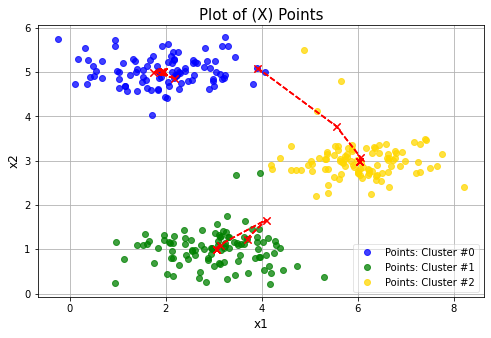

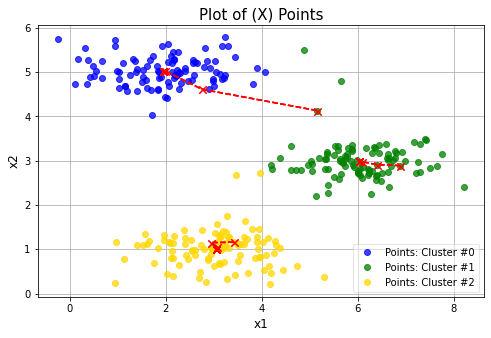

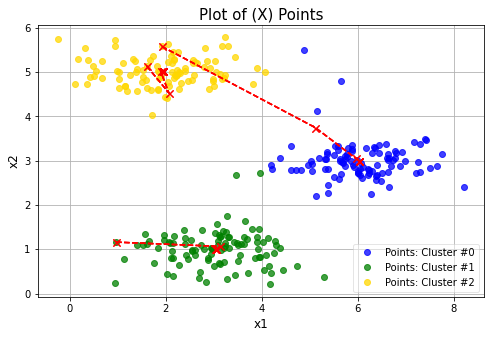

In [8]:
# function for picking random centroids
def pick_K_RandomCentroids(X, K):
    random_indices = sample(range(0,X.shape[0]),K)
    return np.array([X[i] for i in random_indices])

for x in range(3):
    idxs, centroid_history = execute_KMeans(X,pick_K_RandomCentroids(X,K=3),K=3,num_iter=10)
    plotData(X,centroid_history,idxs)

### Image Compression with K-Means

input_image shape =  (128, 128, 3)


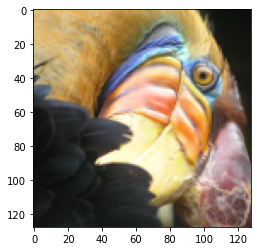

In [9]:
# image
input_file = 'database/bird_small.png'

# creating a 3D matrix (input_image)
# first 2 indices of input_image identify pixel position
# third index represents RGB
input_image = imageio.imread(input_file)

print("input_image shape = ",input_image.shape)
temp = plt.imshow(input_image)

In [10]:
# feature scaling (dividing by 255)
input_image = input_image / 255.

# unrolling input_image to shape (16384,3) (16384 = 128*128)
input_image = input_image.reshape(-1, 3)

# executing K-Means on this data, forming 16 clusters, each representing a colour, with random initialization
K = 16
idxs, centroid_history = execute_KMeans(input_image,pick_K_RandomCentroids(input_image,K),K,num_iter=10)
idxs = findClosestCentroids(input_image, centroid_history[-1])

In [11]:
final_centroids = centroid_history[-1]
output_image = np.zeros((idxs.shape[0],3))
for x in range(output_image.shape[0]):
    output_image[x] = final_centroids[int(idxs[x])]

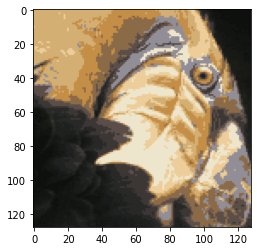

In [12]:
# reshaping and displaying the compressed image
plt.figure()
temp = plt.imshow(output_image.reshape(128,128,3))

# note the stark difference between input_image and output_image

### Principal Component Analysis

(50, 2)

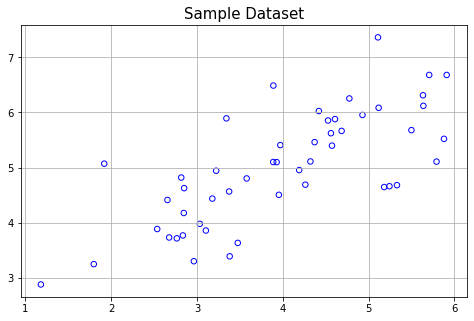

In [13]:
# dataset 2
input_file = 'database/ex7data1.mat'

# scipy.io for loading .mat files
mat_data = scipy.io.loadmat(input_file)
X = mat_data['X']

# displaying shape of X
display(X.shape)

# plotting the dataset
plt.figure(figsize=(8,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Sample Dataset",fontsize=15)
plt.grid(True)

In [14]:
# feature normalization
def featureNormalization(X):
    stored_means = np.mean(X,axis=0)
    X_normalized = X - stored_means
    stored_deviations  = np.std(X_normalized,axis=0)
    X_normalized = X_normalized / stored_deviations
    return stored_means, stored_deviations, X_normalized

# getting U,S,V values as required
def get_USV(X_normalized):
    # computing the covariance matrix
    covariance_matrix = X_normalized.T.dot(X_normalized)/X_normalized.shape[0]
    # running SVD (Single Value Decomposition) to get the U principal component matrix
    U, S, V = scipy.linalg.svd(covariance_matrix, full_matrices = True, compute_uv = True)
    return U, S, V

# running SVD
stored_means, stored_devations, X_normalized = featureNormalization(X)
U, S, V = get_USV(X_normalized)

display(U,S,V)

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

array([1.73553038, 0.26446962])

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

Best principal component is  [-0.70710678 -0.70710678]


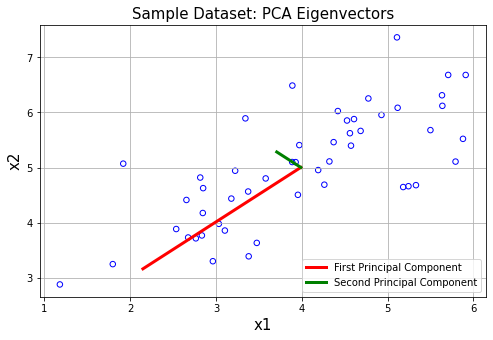

In [15]:
# finding the Eigenvector
print ('Best principal component is ',U[:,0])

# plotting the data with the principal component 
plt.figure(figsize=(8,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Sample Dataset: PCA Eigenvectors",fontsize=15)
plt.xlabel('x1',fontsize=15)
plt.ylabel('x2',fontsize=15)
plt.grid(True)

# drawing the principal component, starting at the mean of the data
plt.plot([stored_means[0], stored_means[0] + 1.5*S[0]*U[0,0]], 
         [stored_means[1], stored_means[1] + 1.5*S[0]*U[0,1]],
        color='red',linewidth=3,
        label='First Principal Component')
plt.plot([stored_means[0], stored_means[0] + 1.5*S[1]*U[1,0]], 
         [stored_means[1], stored_means[1] + 1.5*S[1]*U[1,1]],
        color='green',linewidth=3,
        label='Second Principal Component')
legend = plt.legend(loc=4)

### Dimensionality Reduction using PCA

In [16]:
# function for projecting data
def projectData(X, U, K):
    # U_reduces is the first "K" columns in U
    U_reduced = U[:,:K]
    z = X.dot(U_reduced)
    return z

z = projectData(X_normalized,U,1)
print('Projection of 2nd example: %0.2f.'%float(z[1]))

Projection of 2nd example: -0.92.


In [17]:
# reconstructing the data (approximately)
def reconstructData(Z, U, K):
    U_reduced = U[:,:K]
    X_approx = Z.dot(U_reduced.T)  
    return X_approx

X_reconstructed = reconstructData(z,U,1)
print('Reconstructed approximation of the 2nd example: ',X_reconstructed[1])

Reconstructed approximation of the 2nd example:  [0.65208021 0.65208021]


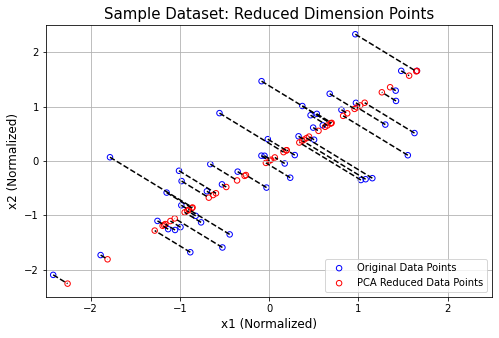

In [18]:
# visualizing the projections
plt.figure(figsize=(8,5))
plot = plt.scatter(X_normalized[:,0], X_normalized[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Sample Dataset: Reduced Dimension Points",fontsize=15)
plt.xlabel('x1 (Normalized)',fontsize=12)
plt.ylabel('x2 (Normalized)',fontsize=12)
plt.grid(True)

for x in range(X_normalized.shape[0]):
    plt.plot([X_normalized[x,0],X_reconstructed[x,0]],[X_normalized[x,1],X_reconstructed[x,1]],'k--')
    
legend = plt.legend(loc=4)
temp = plt.xlim((-2.5,2.5))
temp = plt.ylim((-2.5,2.5))

In [19]:
# creating a function to display matrix as an image
# reference- https://github.com/scipy/scipy/blob/368dbad596a0bd0d5a88a7aec381fdc912440ee1/scipy/misc/pilutil.py#L286-L409
import numpy as np
from PIL import Image


_errstr = "Mode is unknown or incompatible with input array shape."


def bytescale(data, cmin=None, cmax=None, high=255, low=0):
    """
    Byte scales an array (image).
    Byte scaling means converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255).
    If the input image already has dtype uint8, no scaling is done.
    This function is only available if Python Imaging Library (PIL) is installed.
    Parameters
    ----------
    data : ndarray
        PIL image data array.
    cmin : scalar, optional
        Bias scaling of small values. Default is ``data.min()``.
    cmax : scalar, optional
        Bias scaling of large values. Default is ``data.max()``.
    high : scalar, optional
        Scale max value to `high`.  Default is 255.
    low : scalar, optional
        Scale min value to `low`.  Default is 0.
    Returns
    -------
    img_array : uint8 ndarray
        The byte-scaled array.
    Examples
    --------
    >>> from scipy.misc import bytescale
    >>> img = np.array([[ 91.06794177,   3.39058326,  84.4221549 ],
    ...                 [ 73.88003259,  80.91433048,   4.88878881],
    ...                 [ 51.53875334,  34.45808177,  27.5873488 ]])
    >>> bytescale(img)
    array([[255,   0, 236],
           [205, 225,   4],
           [140,  90,  70]], dtype=uint8)
    >>> bytescale(img, high=200, low=100)
    array([[200, 100, 192],
           [180, 188, 102],
           [155, 135, 128]], dtype=uint8)
    >>> bytescale(img, cmin=0, cmax=255)
    array([[91,  3, 84],
           [74, 81,  5],
           [52, 34, 28]], dtype=uint8)
    """
    if data.dtype == np.uint8:
        return data

    if high > 255:
        raise ValueError("`high` should be less than or equal to 255.")
    if low < 0:
        raise ValueError("`low` should be greater than or equal to 0.")
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint8)


def toimage(arr, high=255, low=0, cmin=None, cmax=None, pal=None,
            mode=None, channel_axis=None):
    """Takes a numpy array and returns a PIL image.
    This function is only available if Python Imaging Library (PIL) is installed.
    The mode of the PIL image depends on the array shape and the `pal` and
    `mode` keywords.
    For 2-D arrays, if `pal` is a valid (N,3) byte-array giving the RGB values
    (from 0 to 255) then ``mode='P'``, otherwise ``mode='L'``, unless mode
    is given as 'F' or 'I' in which case a float and/or integer array is made.
    .. warning::
        This function uses `bytescale` under the hood to rescale images to use
        the full (0, 255) range if ``mode`` is one of ``None, 'L', 'P', 'l'``.
        It will also cast data for 2-D images to ``uint32`` for ``mode=None``
        (which is the default).
    Notes
    -----
    For 3-D arrays, the `channel_axis` argument tells which dimension of the
    array holds the channel data.
    For 3-D arrays if one of the dimensions is 3, the mode is 'RGB'
    by default or 'YCbCr' if selected.
    The numpy array must be either 2 dimensional or 3 dimensional.
    """
    data = np.asarray(arr)
    if np.iscomplexobj(data):
        raise ValueError("Cannot convert a complex-valued array.")
    shape = list(data.shape)
    valid = len(shape) == 2 or ((len(shape) == 3) and
                                ((3 in shape) or (4 in shape)))
    if not valid:
        raise ValueError("'arr' does not have a suitable array shape for "
                         "any mode.")
    if len(shape) == 2:
        shape = (shape[1], shape[0])  # columns show up first
        if mode == 'F':
            data32 = data.astype(np.float32)
            image = Image.frombytes(mode, shape, data32.tostring())
            return image
        if mode in [None, 'L', 'P']:
            bytedata = bytescale(data, high=high, low=low,
                                 cmin=cmin, cmax=cmax)
            image = Image.frombytes('L', shape, bytedata.tostring())
            if pal is not None:
                image.putpalette(np.asarray(pal, dtype=np.uint8).tostring())
                # Becomes a mode='P' automagically.
            elif mode == 'P':  # default gray-scale
                pal = (np.arange(0, 256, 1, dtype=np.uint8)[:, np.newaxis] *
                       np.ones((3,), dtype=np.uint8)[np.newaxis, :])
                image.putpalette(np.asarray(pal, dtype=np.uint8).tostring())
            return image
        if mode == '1':  # high input gives threshold for 1
            bytedata = (data > high)
            image = Image.frombytes('1', shape, bytedata.tostring())
            return image
        if cmin is None:
            cmin = np.amin(np.ravel(data))
        if cmax is None:
            cmax = np.amax(np.ravel(data))
        data = (data*1.0 - cmin)*(high - low)/(cmax - cmin) + low
        if mode == 'I':
            data32 = data.astype(np.uint32)
            image = Image.frombytes(mode, shape, data32.tostring())
        else:
            raise ValueError(_errstr)
        return image

    # if here then 3-d array with a 3 or a 4 in the shape length.
    # Check for 3 in datacube shape --- 'RGB' or 'YCbCr'
    if channel_axis is None:
        if (3 in shape):
            ca = np.flatnonzero(np.asarray(shape) == 3)[0]
        else:
            ca = np.flatnonzero(np.asarray(shape) == 4)
            if len(ca):
                ca = ca[0]
            else:
                raise ValueError("Could not find channel dimension.")
    else:
        ca = channel_axis

    numch = shape[ca]
    if numch not in [3, 4]:
        raise ValueError("Channel axis dimension is not valid.")

    bytedata = bytescale(data, high=high, low=low, cmin=cmin, cmax=cmax)
    if ca == 2:
        strdata = bytedata.tostring()
        shape = (shape[1], shape[0])
    elif ca == 1:
        strdata = np.transpose(bytedata, (0, 2, 1)).tostring()
        shape = (shape[2], shape[0])
    elif ca == 0:
        strdata = np.transpose(bytedata, (1, 2, 0)).tostring()
        shape = (shape[2], shape[1])
    if mode is None:
        if numch == 3:
            mode = 'RGB'
        else:
            mode = 'RGBA'

    if mode not in ['RGB', 'RGBA', 'YCbCr', 'CMYK']:
        raise ValueError(_errstr)

    if mode in ['RGB', 'YCbCr']:
        if numch != 3:
            raise ValueError("Invalid array shape for mode.")
    if mode in ['RGBA', 'CMYK']:
        if numch != 4:
            raise ValueError("Invalid array shape for mode.")

    # Here we know data and mode is correct
    image = Image.frombytes(mode, shape, strdata)
    return image

In [20]:
# dataset 3
input_file = 'database/ex7faces.mat'

# scipy.io for loading .mat files
mat_data = scipy.io.loadmat(input_file)
X = mat_data['X']

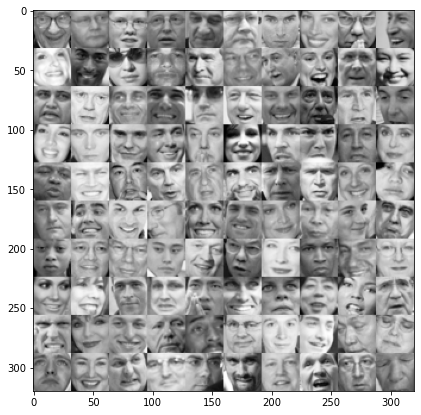

In [21]:
def getImage(x):
    """
    Input: np array with shape 1*1032
    Output: image object 
    """
    w, h = 32, 32
    sq = x.reshape(w,h)
    return sq.T

def displayData(X, nrows=10, ncols=10):
    """
    Picks 100 random rows from X, creates a grid of images, and displays the same.
    """
    w, h = 32, 32
    num_rows, num_columns = nrows, ncols
    
    grid_images = np.zeros((h*num_rows,w*num_columns))
    
    row_i, col_i = 0, 0
    for i in range(num_rows*num_columns):
        if col_i == num_columns:
            row_i += 1
            col_i  = 0
        img_i = getImage(X[i])
        grid_images[row_i*h:row_i*h+img_i.shape[0],col_i*w:col_i*w+img_i.shape[1]] = img_i
        col_i += 1
    fig = plt.figure(figsize=(7,7))
    image = toimage(grid_images) # displays matrix as an image
    plt.imshow(image,cmap = cm.Greys_r)
    
displayData(X)

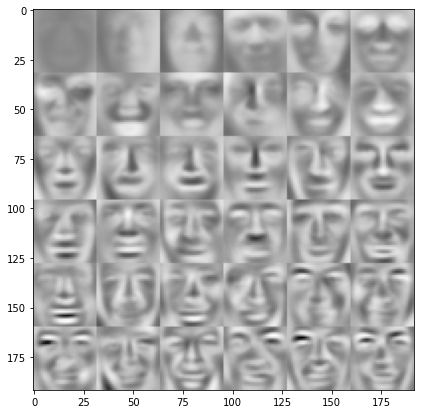

In [22]:
# PCA on faces
# running SVD
stored_means, stored_devations, X_normalized = featureNormalization(X)
U, S, V = get_USV(X_normalized)

# visualizing top 36 Eigenvectors
displayData(U[:,:36].T,nrows=6,ncols=6)

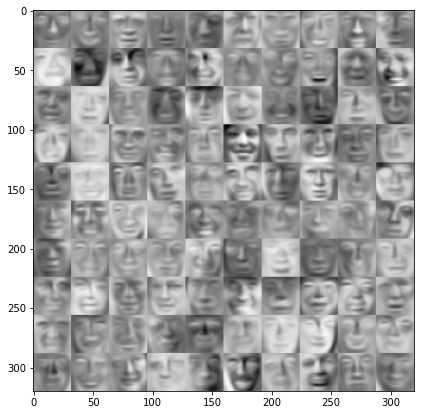

In [23]:
# dimensionality reduction
z = projectData(X_normalized, U, K=36)
# reconstructing X
X_reconstructed = reconstructData(z, U, K=36)

# plotting the dimension-reduced data
displayData(X_reconstructed)

### PCA for Visualization

In [24]:
# PCA on input_image
# running SVD
stored_means, stored_devations, image_normalized = featureNormalization(X)
U, S, V = get_USV(image_normalized)

# using PCA to reduce the data from 3 to 2 dimensions
z = projectData(image_normalized,U,2)

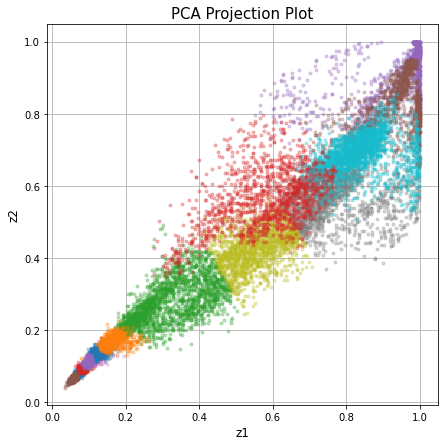

In [25]:
# displaying in 2D
sub_X = []
for x in range(len(np.unique(idxs))):
    sub_X.append(np.array([input_image[i] for i in range(input_image.shape[0]) if idxs[i] == x]))
        
fig = plt.figure(figsize=(7,7))
for x in range(len(sub_X)):
    new_X = sub_X[x]
    plt.plot(new_X[:,0],new_X[:,1],'.',alpha=0.3)
    
plt.xlabel('z1',fontsize=12)
plt.ylabel('z2',fontsize=12)
plt.title('PCA Projection Plot',fontsize=15)
plt.grid(True)